This time we will be implementing an RNN model.

Time series forcasting is an important topic in Machine Learning.\
In this, we will are given the data for sunspots from jan 1749 to dec 1983.\
we will be dividing this data in to two parts, one for training our model and second for testing our model.\
In time series forcasting, we will have to take continuous data and not randomized data, because we have to predict on the basis of given past data.

In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

We will have to take the data from the url given.

You have to implement the get_train_test function and return train_data and test_data, scaled in the range [0,1]

To scale the data, read on MinMaxScalar class in sklearn.preprocessing

Testing data should be the first 80 percent values and rest should be testing data. Also, convert the index of the data to datetime

In [2]:
from sklearn.preprocessing import MinMaxScaler
def get_train_test(url):
    data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values)

    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:]

    return train_data, test_data

Now we will take the data from your implemented function :)

In [3]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data = get_train_test(sunspots_url)

X_train = train_data[:-1]
y_train = train_data[1:]

X_test = test_data[:-1]
y_test = test_data[1:]

Now let's make the model for our computations.

The model will consist of a layer of RNN of 64 nodes followed by a layer of Feed Forward Neural Network of one output node.

For compiling the node, we will use mean squared error as loss and mean absolute error as metric. We will not use accuracy as the metric. Think on why :)

In [6]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

Epoch 1/10
71/71 [==============================] - 2s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0752
Epoch 2/10
71/71 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0459
Epoch 3/10
71/71 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0447
Epoch 4/10
71/71 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0451
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0453
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0449
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0452
Epoch 8/10
71/71 [==============================] - 0s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0458
Epoch 9/10
71/71 [==============================] - 0s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0450
Epoch 10/10
18/18 [

Now let's print out what you have done :)

Train RMSE: 0.063 RMSE
Test RMSE: 0.080 RMSE


Text(0.5, 1.0, 'Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

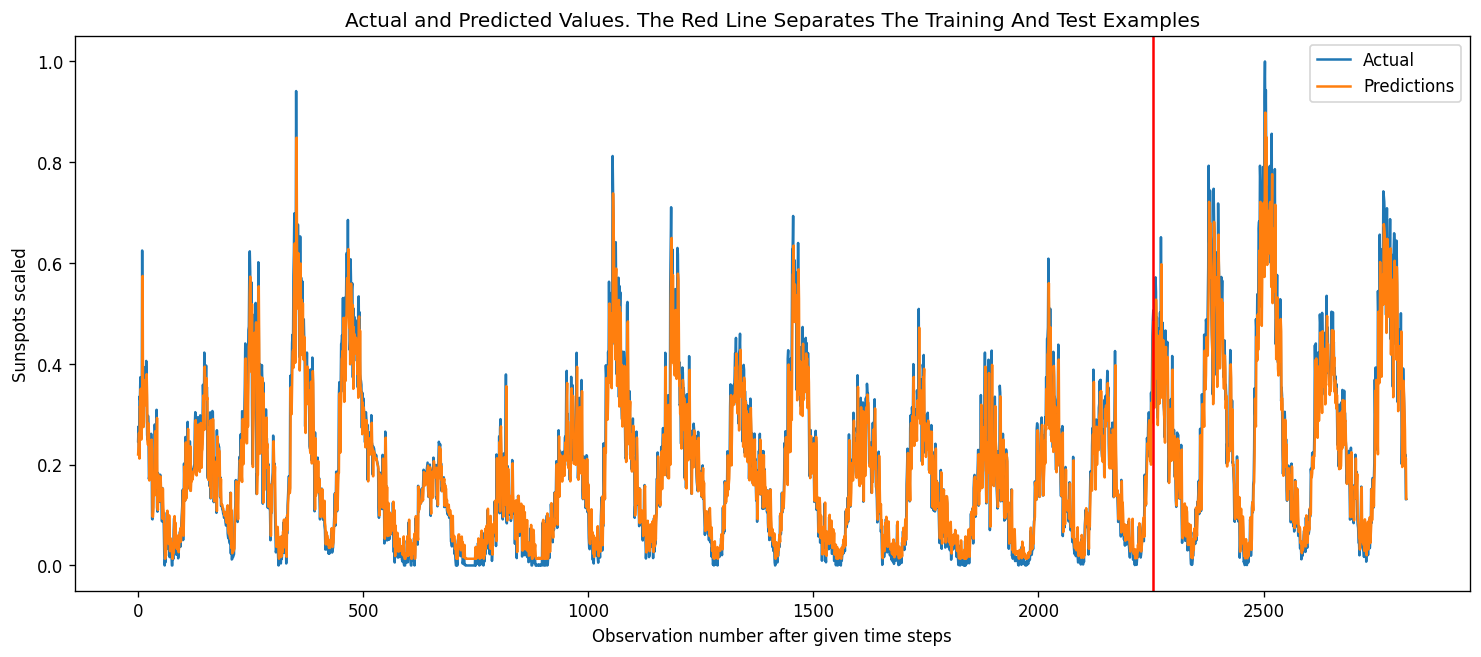

In [7]:
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))

actual = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=120)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(y_train), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')